In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import pickle
import numpy as np

## 导入数据

In [2]:
# wrf插值后数据
interp_00 = sio.loadmat(os.path.join('../data', 'interp_00_all.mat'))
interp_01 = sio.loadmat(os.path.join('../data', 'interp_01_all.mat'))
interp_02 = sio.loadmat(os.path.join('../data', 'interp_02_all.mat'))
interp_03 = sio.loadmat(os.path.join('../data', 'interp_03_all.mat'))
interp_00.keys()

FileNotFoundError: [Errno 2] No such file or directory: '../data\\interp_00_all.mat'

In [ ]:
# 观测数据--real
with open('../data/real_dataset_noabnormal', 'rb') as f:
    real_target = pickle.load(f)
print(real_target.keys())

In [3]:
real_target

NameError: name 'real_target' is not defined

## Label

In [5]:
# 观测数据分组（分站位）
df_group = real_target.groupby('站位编号')

# A点风速和风向
real_velocity_00 = df_group.get_group(0)['平均风速_10m'].values
real_velocity_01 = df_group.get_group(1)['平均风速_10m'].values
real_velocity_02 = df_group.get_group(2)['平均风速_10m'].values
real_velocity_03 = df_group.get_group(3)['平均风速_10m'].values

## Feature

In [6]:
# 特征数据--00
velocity10_interp_00 = interp_00['velocity10_00']
degree_interp_00 = interp_00['degree_00']
u10_interp_00 = interp_00['u10_00']
v10_interp_00 = interp_00['v10_00']
rh2_interp_00 = interp_00['rh2_00']
t2_interp_00 = interp_00['t2_00']
slp_interp_00 = interp_00['slp_00']

In [7]:
# 特征数据--01
velocity10_interp_01 = interp_01['velocity10_01']
degree_interp_01 = interp_01['degree_01']
u10_interp_01 = interp_01['u10_01']
v10_interp_01 = interp_01['v10_01']
rh2_interp_01 = interp_01['rh2_01']
t2_interp_01 = interp_01['t2_01']
slp_interp_01 = interp_01['slp_01']

In [8]:
# 特征数据--02
velocity10_interp_02 = interp_02['velocity10_02']
degree_interp_02 = interp_02['degree_02']
u10_interp_02 = interp_02['u10_02']
v10_interp_02 = interp_02['v10_02']
rh2_interp_02 = interp_02['rh2_02']
t2_interp_02 = interp_02['t2_02']
slp_interp_02 = interp_02['slp_02']

In [9]:
# 特征数据--03
velocity10_interp_03 = interp_03['velocity10_03']
degree_interp_03 = interp_03['degree_03']
u10_interp_03 = interp_03['u10_03']
v10_interp_03 = interp_03['v10_03']
rh2_interp_03 = interp_03['rh2_03']
t2_interp_03 = interp_03['t2_03']
slp_interp_03 = interp_03['slp_03']

## RandomForest

In [10]:
# 检查是否有nan
print(np.where(np.isnan(velocity10_interp_00)))
print(np.where(np.isnan(velocity10_interp_01)))
print(np.where(np.isnan(velocity10_interp_02)))
print(np.where(np.isnan(velocity10_interp_03)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [13]:
# 把多个变量合并为一个数组
features = np.concatenate((velocity10_interp_00,
                            degree_interp_00,
                            u10_interp_00,
                           v10_interp_00,
                           rh2_interp_00,
                           t2_interp_00,
                           slp_interp_00), axis=0)

In [14]:
features.shape

(7, 14337)

In [15]:
# 创建并训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features.T, real_velocity_00)

RandomForestRegressor(random_state=42)

In [16]:
# 变量名字符串
variables_str = ['velocity10_interp_00', 'degree_interp_00',
                 'u10_interp_00', 'v10_interp_00', 'rh2_interp_00',
                 't2_interp_00', 'slp_interp_00']
# 各变量重要性
feature_importance = rf.feature_importances_

# 合并为字典 以 方便查看
dict_result_velocity_00 = dict(zip(variables_str, feature_importance))

In [17]:
for key, value in dict_result_velocity_00.items():
    print(key, ': ', value)

velocity10_interp_00 :  0.5835445706990112
degree_interp_00 :  0.035985413563849676
u10_interp_00 :  0.04507596751668419
v10_interp_00 :  0.059554353633821513
rh2_interp_00 :  0.06264293286653409
t2_interp_00 :  0.10612765995906015
slp_interp_00 :  0.10706910176103912


In [18]:
# 按重要性降序
sorted_features = sorted(dict_result_velocity_00.items(), key=lambda x: x[1], reverse=True)
# 提取排序后的特征名和对应的重要性
sorted_variable_names, importance_values = zip(*sorted_features)

## 绘图

In [20]:
sorted_variable_names

('velocity10_interp_00',
 'slp_interp_00',
 't2_interp_00',
 'rh2_interp_00',
 'v10_interp_00',
 'u10_interp_00',
 'degree_interp_00')

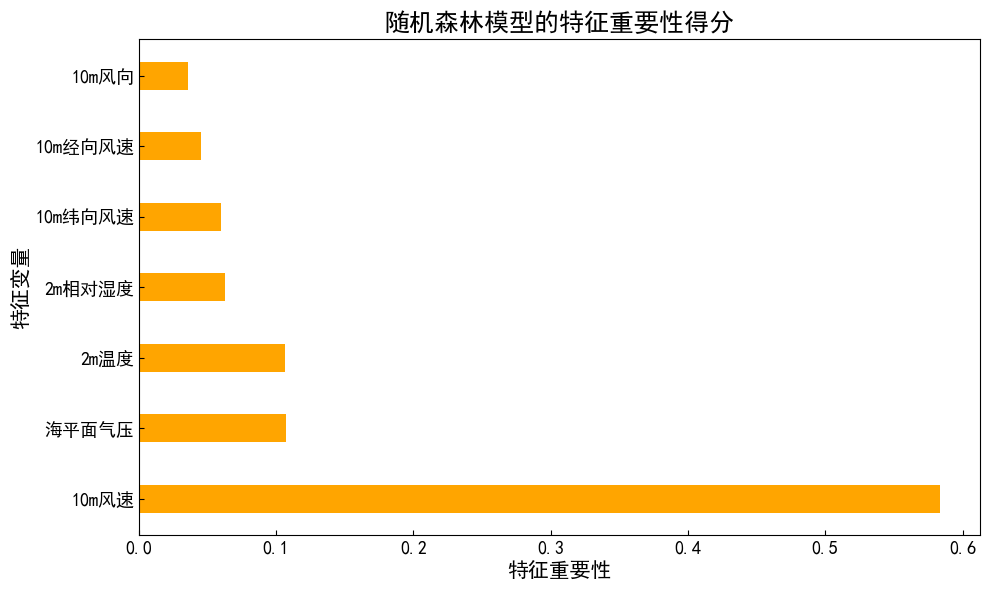

In [40]:
# 设置Matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

variable_names = ['10m风速','海平面气压','2m温度','2m相对湿度','10m纬向风速','10m经向风速','10m风向']
# 绘制柱状图（水平）
plt.figure(figsize=(10, 6))
plt.barh(variable_names, width=importance_values, color='orange', height=0.4)
plt.tick_params(direction='in', labelsize=13)
plt.xlabel('特征重要性', fontsize=15)
plt.ylabel('特征变量', fontsize=15)
plt.title('随机森林模型的特征重要性得分', fontsize=18)
# 显示图形
plt.tight_layout()
plt.savefig('../pic/00_RandomForest.png', dpi=300)
plt.show()